1. 读取data中2023_6文件夹中的./data/2023_6/open_rank_20236.csv数据集，分析美国排名前一百的项目的的value的最大值、最小值、均值以及中位数。

In [8]:
import pandas as pd

file_path = "./data/2023_6/open_rank_20236.csv"
data = pd.read_csv(file_path)

top_100_data = data[data["rank"] <= 100]

value_max = top_100_data["value"].max()
value_min = top_100_data["value"].min()
value_mean = top_100_data["value"].mean()
value_median = top_100_data["value"].median()

print("排名前100项目的 'value' 列统计信息：")
print(f"最大值: {value_max}")
print(f"最小值: {value_min}")
print(f"均值: {value_mean}")
print(f"中位数: {value_median}")


排名前100项目的 'value' 列统计信息：
最大值: 1394.45
最小值: 200.68
均值: 346.9679
中位数: 273.66999999999996


2. 读取data中2022文件夹下的activity_2020文件，分析美国排名前十的项目的平均增长率。

In [11]:
import pandas as pd

file_path = "./data/2022/activity_2022.csv"
data = pd.read_csv(file_path)
top_10_data = data.head(10)

growth_rates = []
for _, row in top_10_data.iterrows():
    start_value = row["20221_value"]
    end_value = row["202212_value"]
    if start_value != 0:  # 避免除零
        growth_rate = (end_value - start_value) / start_value
        growth_rates.append(growth_rate)

if growth_rates:
    average_growth_rate = sum(growth_rates) / len(growth_rates)
    print("前10个项目的平均增长率：")
    print(f"平均增长率: {average_growth_rate:.2%}")
else:
    print("没有有效的增长率数据。")


前10个项目的平均增长率：
平均增长率: -4.74%


3. data/2022/china_2022.csv表示中国开源领域排名前十的企业。data/2022/global_2022.csv表示开源领域全球前十的的企业，请通过各种统计指标比较两者的各种数据差异。

In [12]:
import pandas as pd

china_file = "./data/2022/china_2022.csv"
global_file = "./data/2022/global_2022.csv"
china_data = pd.read_csv(china_file)
global_data = pd.read_csv(global_file)

metrics = ["issue_comment", "open_issue", "open_pull", "review_comment", "merged_pull", "value"]

def calculate_statistics(data, metrics):
    stats = {}
    for metric in metrics:
        stats[metric] = {
            "mean": data[metric].mean(),
            "median": data[metric].median(),
            "max": data[metric].max(),
            "min": data[metric].min()
        }
    return stats

china_stats = calculate_statistics(china_data, metrics)
global_stats = calculate_statistics(global_data, metrics)

print("中国前十企业的统计信息：")
for metric, values in china_stats.items():
    print(f"{metric}: 平均值={values['mean']:.2f}, 中位数={values['median']}, 最大值={values['max']}, 最小值={values['min']}")

print("\n全球前十企业的统计信息：")
for metric, values in global_stats.items():
    print(f"{metric}: 平均值={values['mean']:.2f}, 中位数={values['median']}, 最大值={values['max']}, 最小值={values['min']}")

print("\n中国和全球前十企业的统计差异：")
for metric in metrics:
    china_mean = china_stats[metric]["mean"]
    global_mean = global_stats[metric]["mean"]
    diff = china_mean - global_mean
    print(f"{metric}: 中国平均值 - 全球平均值 = {diff:.2f}")


中国前十企业的统计信息：
issue_comment: 平均值=61205.50, 中位数=39141.0, 最大值=167814, 最小值=11741
open_issue: 平均值=9169.20, 中位数=6889.5, 最大值=22397, 最小值=752
open_pull: 平均值=16912.70, 中位数=15953.0, 最大值=35266, 最小值=1823
review_comment: 平均值=19857.50, 中位数=10851.0, 最大值=60402, 最小值=2113
merged_pull: 平均值=13764.10, 中位数=13705.5, 最大值=26732, 最小值=1165
value: 平均值=40269.53, 中位数=29789.235, 最大值=103368.49, 最小值=12033.71

全球前十企业的统计信息：
issue_comment: 平均值=341409.40, 中位数=178629.0, 最大值=1437317, 最小值=78530
open_issue: 平均值=43300.20, 中位数=21648.0, 最大值=189185, 最小值=13162
open_pull: 平均值=83423.00, 中位数=49103.5, 最大值=309685, 最小值=27414
review_comment: 平均值=120392.10, 中位数=70433.5, 最大值=456166, 最小值=35072
merged_pull: 平均值=62472.00, 中位数=33288.0, 最大值=257123, 最小值=15418
value: 平均值=215855.49, 中位数=102790.85, 最大值=824848.67, 最小值=71636.82

中国和全球前十企业的统计差异：
issue_comment: 中国平均值 - 全球平均值 = -280203.90
open_issue: 中国平均值 - 全球平均值 = -34131.00
open_pull: 中国平均值 - 全球平均值 = -66510.30
review_comment: 中国平均值 - 全球平均值 = -100534.60
merged_pull: 中国平均值 - 全球平均值 = -48707.90
value: 中国平均

4. 贝叶斯定理

    贝叶斯定理参考：https://zh.wikipedia.org/wiki/%E8%B4%9D%E5%8F%B6%E6%96%AF%E5%AE%9A%E7%90%86

    根据 OpenLeaderboard 上对前 10000 个活跃的项目统计，工具组件型项目占比 50 %，系统应用型占比 25 %，而内容资源型（非软件类）项目占比 25 %，成三分天下的态势。

    非软件类项目中，带有 HTML/Markdown 标签的项目占 85 %，而软件类项目中带 HTML/Markdown标签的项目占比则为 10 %（注：HTML/Markdown 一般可用来书写文档内容）

    工具组件型项目中，JavaScript 语言的项目占比 35 %，而非工具组件型项目中， JavaScript 语言的项目占比则为 10 %（注：JavaScript 是一种脚本编程语言，可以在网页上实现复杂的功能）

    已知一个项目带有 HTML/Markdown 标签，那么该项目是非软件型项目的概率是多少？

In [13]:
# 已知的概率
P_non_software = 0.25  # 非软件类项目的占比
P_software = 0.75      # 软件类项目（工具组件型 + 系统应用型）的占比

# 非软件类项目中带HTML/Markdown标签的概率
P_HTML_given_non_software = 0.85  
# 软件类项目中带HTML/Markdown标签的概率
P_HTML_given_software = 0.10      

# 计算 P(HTML)，即项目带有 HTML/Markdown 标签的总概率
P_HTML = (P_HTML_given_non_software * P_non_software) + (P_HTML_given_software * P_software)

# 使用贝叶斯定理计算 P(非软件|HTML)
P_non_software_given_HTML = (P_HTML_given_non_software * P_non_software) / P_HTML

# 输出结果
print(f"P(HTML) = {P_HTML:.4f}")
print(f"P(非软件|HTML) = {P_non_software_given_HTML:.4f}")


P(HTML) = 0.2875
P(非软件|HTML) = 0.7391


5. 接上文，已知一个项目是由 JavaScript 语言编写的，那么它是工具组件型项目的概率是多少？

In [14]:
# 已知的概率
P_tool = 0.5                      # 工具组件型项目的占比
P_non_tool = 0.5                  # 非工具组件型项目的占比

# 工具组件型项目中JavaScript的占比
P_JavaScript_given_tool = 0.35    
# 非工具组件型项目中JavaScript的占比
P_JavaScript_given_non_tool = 0.10 

# 计算 P(JavaScript)，即项目使用 JavaScript 的总概率
P_JavaScript = (P_JavaScript_given_tool * P_tool) + (P_JavaScript_given_non_tool * P_non_tool)

# 使用贝叶斯定理计算 P(工具|JavaScript)
P_tool_given_JavaScript = (P_JavaScript_given_tool * P_tool) / P_JavaScript

# 输出结果
print(f"P(JavaScript) = {P_JavaScript:.4f}")
print(f"P(工具|JavaScript) = {P_tool_given_JavaScript:.4f}")


P(JavaScript) = 0.2250
P(工具|JavaScript) = 0.7778


6. 根据以下数据建立可视化无向图

    user = [1, 2, 3, 4] 

    edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

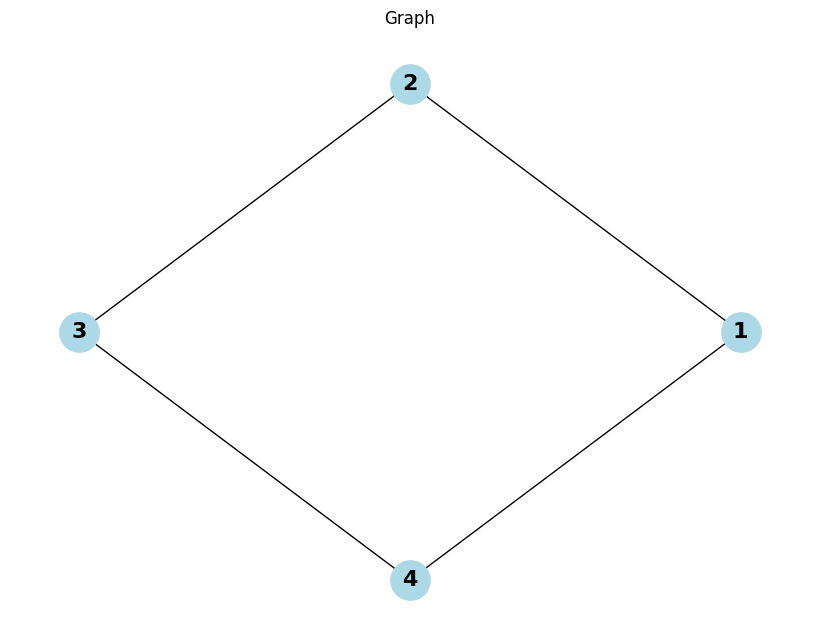

In [16]:
import matplotlib.pyplot as plt
import networkx as nx

# 定义用户和边
user = [1, 2, 3, 4]
edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

# 创建无向图
G = nx.Graph()

# 添加节点
G.add_nodes_from(user)

# 添加边
G.add_edges_from(edge)

# 绘制图形
plt.figure(figsize=(8, 6))
pos = nx.circular_layout(G)  # 使用圆形布局
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800, font_size=16, font_color='black', font_weight='bold')
plt.title('Graph')
plt.show()


7. 根据以下数据建立可视化**有向图**

    users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    
    edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
                (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
                (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

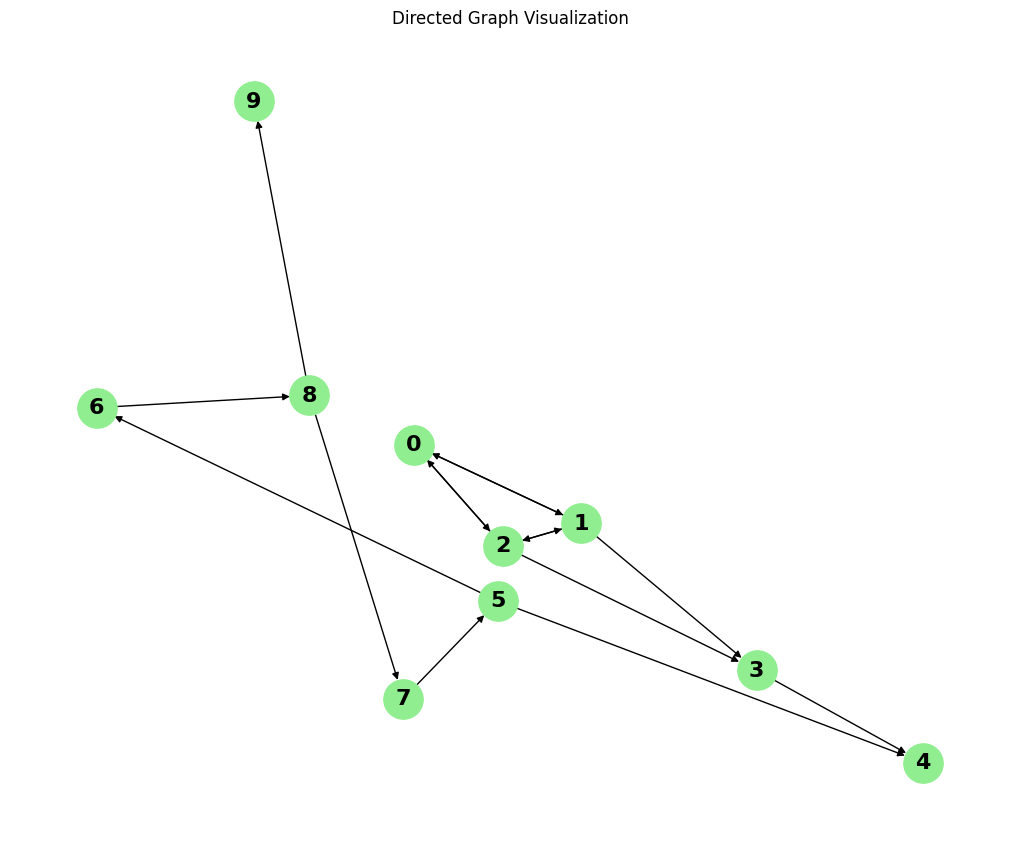

In [17]:
import matplotlib.pyplot as plt
import networkx as nx

# 定义用户和边
users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [
    (0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
    (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
    (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)
]

# 创建有向图
G = nx.DiGraph()

# 添加节点
G.add_nodes_from(users)

# 添加边
G.add_edges_from(edges)

# 绘制图形
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # 使用弹簧布局
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=800, font_size=16, font_color='black', font_weight='bold', arrows=True)
plt.title('Directed Graph Visualization')
plt.show()


8. 针对第七题构建的有向图，计算并输出每个节点的pagerank值。同时根据pagerank调整可视化图的大小，使得PageRank越大的节点在可视化结果中也越大。
    pageRank算法原理：https://zh.wikipedia.org/wiki/PageRank

Node 0: PageRank = 0.0950
Node 1: PageRank = 0.1055
Node 2: PageRank = 0.1055
Node 3: PageRank = 0.0950
Node 4: PageRank = 0.1593
Node 5: PageRank = 0.1020
Node 6: PageRank = 0.0786
Node 7: PageRank = 0.0786
Node 8: PageRank = 0.1020
Node 9: PageRank = 0.0786


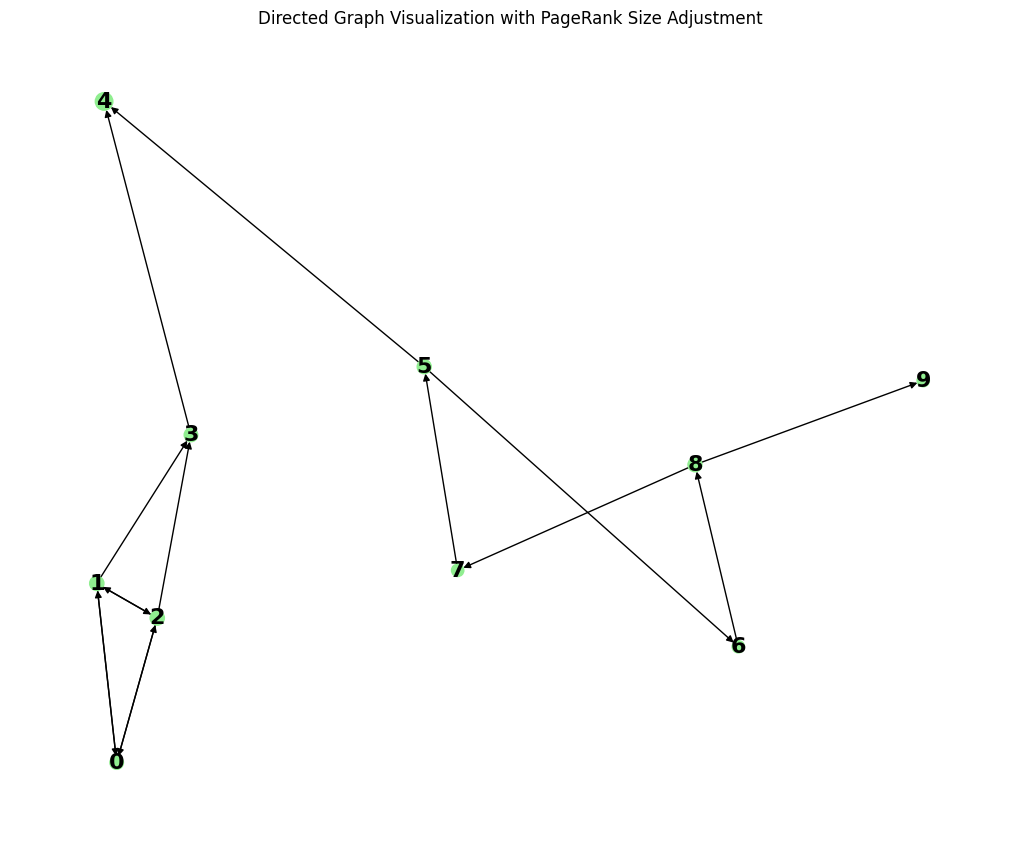

In [18]:
import matplotlib.pyplot as plt
import networkx as nx

# 定义用户和边
users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [
    (0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
    (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
    (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)
]

# 创建有向图
G = nx.DiGraph()

# 添加节点和边
G.add_nodes_from(users)
G.add_edges_from(edges)

# 计算每个节点的 PageRank 值
pagerank_values = nx.pagerank(G)

# 输出每个节点的 PageRank 值
for user, rank in pagerank_values.items():
    print(f"Node {user}: PageRank = {rank:.4f}")

# 根据 PageRank 值调整节点大小
node_sizes = [1000 * pagerank_values[user] for user in users]

# 绘制图形
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # 使用弹簧布局
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=node_sizes, font_size=16, font_color='black', font_weight='bold', arrows=True)
plt.title('Directed Graph Visualization with PageRank Size Adjustment')
plt.show()
